-1.0    821
 1.0     45
Name: attack, dtype: int64
outliers.shape (821,)
outlier fraction 0.9480369515011547
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 9 columns):
Touch_Pressure      866 non-null float64
Touch_Size          866 non-null float64
X_Coordinate        866 non-null float64
Y_Coordinate        866 non-null float64
X_Precision         866 non-null float64
Y_Precision         866 non-null float64
Action_Timestamp    866 non-null float64
Button              866 non-null float64
Action_Type         866 non-null float64
dtypes: float64(9)
memory usage: 61.0 KB
None
nu 0.9480369515011547
accuracy:  0.897398843931
precision:  0.0571428571429
recall:  0.05
f1:  0.0533333333333
area under curve (auc):  0.499693251534
accuracy:  0.913793103448
precision:  0.0
recall:  0.0
f1:  0.0
area under curve (auc):  0.470414201183
(133, 152) (133, 152)
0.985590778098
(133, 152)
0.953890489914
(133, 152)
0.99711815562
(133, 152)
0.99711815562
(133

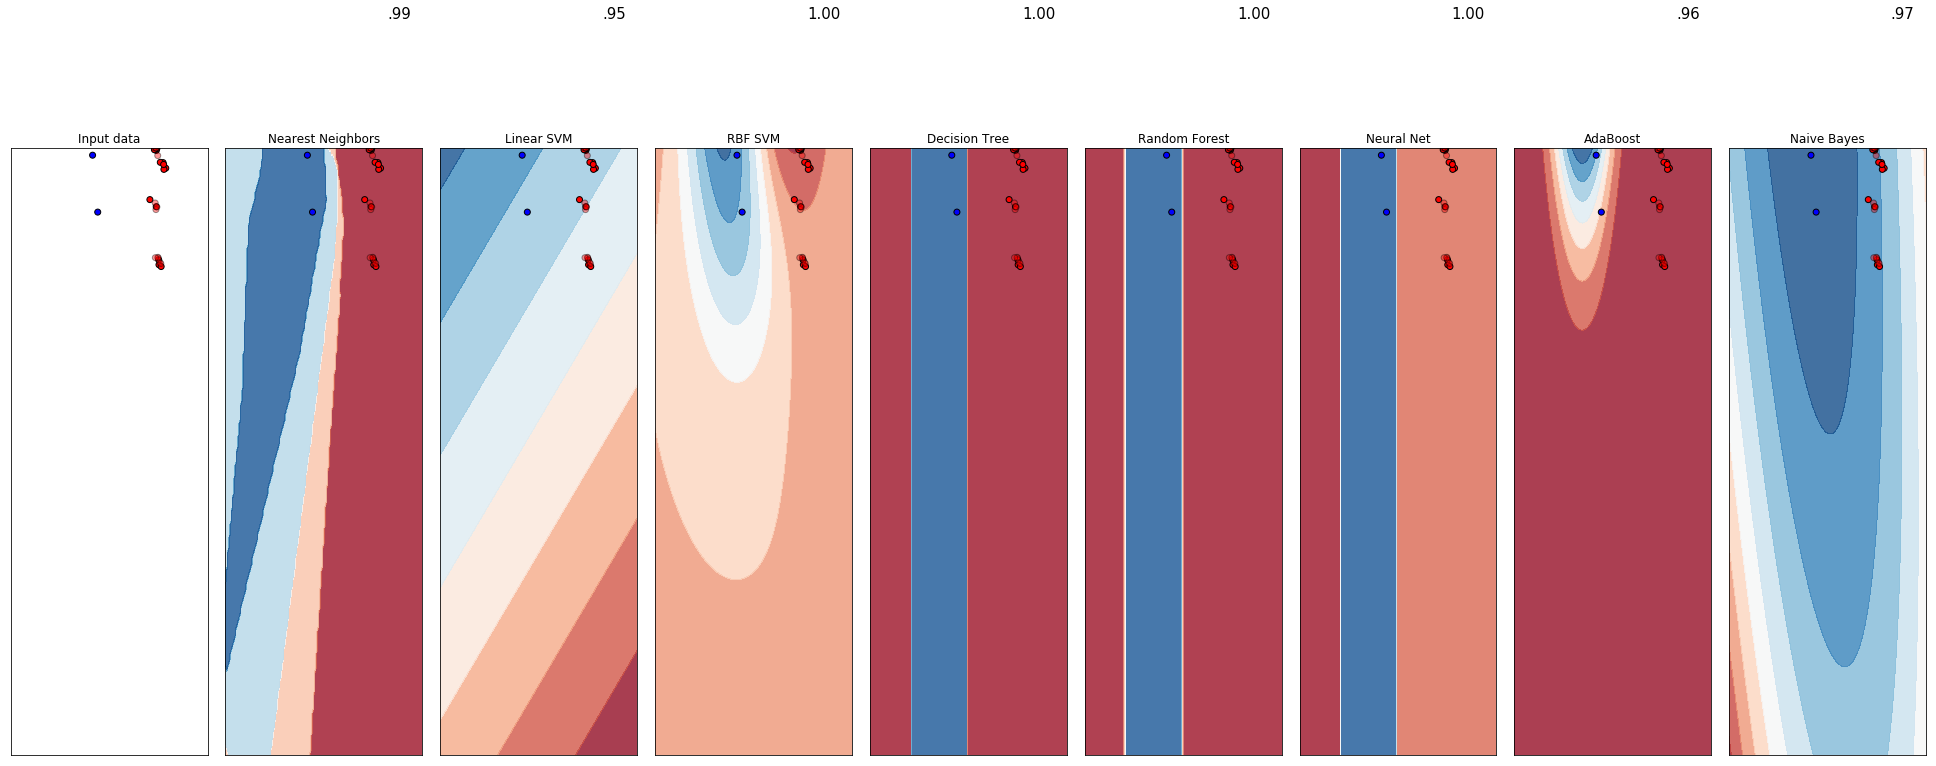

In [4]:
%matplotlib inline

import lsanomaly
import numpy as np  
import pandas as pd  
from sklearn import utils  
import matplotlib
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA, IncrementalPCA

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=2),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

# import the CSV from http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html
# this will return a pandas dataframe.
data = pd.read_csv('C:/Users/user/.spyder-py3/loopdata.csv', low_memory=False)


#relevant_features = [  
#    "UUID",
#    "X_Coordinate",
#    "Y_Coordinate",
#]
relevant_features = [  
    "UUID",
    "Touch_Pressure",
    "Touch_Size",
    "Button",
    "Action_Type",
    "X_Coordinate",
    "Y_Coordinate",
    "X_Precision",
    "Y_Precision",
    "Action_Timestamp",
]
data = data[relevant_features]
data.loc[data['UUID'] == "AEVXC1499703691514", "attack"] = 1  
data.loc[data['UUID'] != "AEVXC1499703691514", "attack"] = -1

target = data['attack']
print(data['attack'].value_counts())

data.drop(["UUID", "attack"], axis=1, inplace=True)
data=data.loc[:, 'Touch_Pressure':]

#data.drop(["HR_Timestamp","Language","Hardware_Model","SDK_Version","Manufacture","Screen_Size","Time_Zone","Date_Time","Country_Code","Location","Num_of_CPU_Cores","Location_lat","Location_long"], axis=1, inplace=True)

categorical_columns=["Button","Action_Type"]
cate_data = data[categorical_columns]

#for col in data.columns.values:
#    print(col, data[col].unique())

pd.set_option('mode.chained_assignment', None)

def label_encode(cate_data, columns):
    for col in columns:
        le = LabelEncoder()
        col_values_unique = list(cate_data[col].unique())
        le_fitted = le.fit(col_values_unique)
 
        col_values = list(cate_data[col].values)
        le.classes_
        col_values_transformed = le.transform(col_values)
        cate_data[col] = col_values_transformed
 
to_be_encoded_cols = cate_data.columns.values
label_encode(cate_data, to_be_encoded_cols)
#display(cate_data.head())

data.drop(["Button","Action_Type"], axis=1, inplace=True)
data=pd.concat([data,cate_data], axis=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

data["Touch_Pressure"] = np.log((data["Touch_Pressure"] + 0.1).astype(float))  
data["Touch_Size"] = np.log((data["Touch_Size"] + 0.1).astype(float))  
data["X_Coordinate"] = np.log((data["X_Coordinate"] + 0.1).astype(float))
data["Y_Coordinate"] = np.log((data["Y_Coordinate"] + 0.1).astype(float)) 
data["X_Precision"] = np.log((data["X_Precision"] + 0.1).astype(float)) 
data["Y_Precision"] = np.log((data["Y_Precision"] + 0.1).astype(float)) 
data["Button"] = np.log((data["Button"] + 0.1).astype(float))
data["Action_Type"] = np.log((data["Action_Type"] + 0.1).astype(float))
data["Action_Timestamp"] = np.log(((data["Y_Precision"]*0.0000001) + 0.1).astype(float))

outliers = target[target == -1]  

print("outliers.shape", outliers.shape)  
print("outlier fraction", outliers.shape[0]/target.shape[0])

# check the shape for sanity checking.
data.shape
print(data.info())

from sklearn.model_selection import train_test_split  
train_data, test_data, train_target, test_target = train_test_split(data, target, train_size = 0.8)  
train_data.shape

from sklearn import svm

# set nu (which should be the proportion of outliers in our dataset)
nu = outliers.shape[0] / target.shape[0]  
print("nu", nu)

#model=RandomForestClassifier()
#model.fit(train_data,train_target) 

model = svm.OneClassSVM(nu=nu, kernel='rbf', gamma='auto')  
model.fit(train_data) 

from sklearn import metrics  
preds = model.predict(train_data)  
targs = train_target


print("accuracy: ", metrics.accuracy_score(targs, preds))  
print("precision: ", metrics.precision_score(targs, preds))  
print("recall: ", metrics.recall_score(targs, preds))  
print("f1: ", metrics.f1_score(targs, preds))  
print("area under curve (auc): ", metrics.roc_auc_score(targs, preds))

preds = model.predict(test_data)  
targs = test_target

print("accuracy: ", metrics.accuracy_score(targs, preds))  
print("precision: ", metrics.precision_score(targs, preds))  
print("recall: ", metrics.recall_score(targs, preds))  
print("f1: ", metrics.f1_score(targs, preds))  
print("area under curve (auc): ", metrics.roc_auc_score(targs, preds))
n_components = 2
ipca = IncrementalPCA(n_components=n_components, batch_size=10)
reduced_data= ipca.fit_transform(scaled_data)


XYdata=(reduced_data,target)
datasets=[XYdata]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    #X, y = ds
    #X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(reduced_data, target, test_size=.4, random_state=42)

    X=np.array(data)
    X_train = np.array(X_train)
    X_test = np.array(X_test)

    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    print(xx.shape,yy.shape)
    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    #print(len(datasets), len(classifiers))
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,edgecolors='k')
        # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.4,edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i+=1
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        y_pred=clf.predict(X_test)
        score = clf.score(X_test, y_test)
        print(score)
            # Plot the decision boundary. For that, we will assign a color to each
            # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
            #Z = clf.decision_function(X_test)
        #else:
            #Z = clf.predict_proba(X_test)
        #print(X_test.shape)
            # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        print(Z.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

            # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,edgecolors='k')
            # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,edgecolors='k', alpha=0.4)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(.4, .4, ('%.2f' % score).lstrip('0'),size=15, horizontalalignment='right')
        i+=1
plt.tight_layout()
plt.show()

30
270


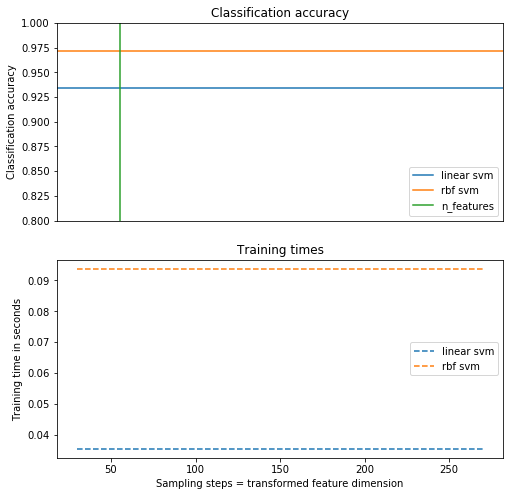

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from time import time

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, pipeline


# The digits dataset
digits = datasets.load_digits(n_class=9)

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.data)
data = digits.data / 16.
data -= data.mean(axis=0)

# We learn the digits on the first half of the digits
data_train, targets_train = (data[:n_samples // 2],
                             digits.target[:n_samples // 2])


# Now predict the value of the digit on the second half:
data_test, targets_test = (data[n_samples // 2:],
                           digits.target[n_samples // 2:])
# data_test = scaler.transform(data_test)

# Create a classifier: a support vector classifier
kernel_svm = svm.SVC(gamma=.2)
linear_svm = svm.LinearSVC()



# fit and predict using linear and kernel svm:

kernel_svm_time = time()
kernel_svm.fit(data_train, targets_train)
kernel_svm_score = kernel_svm.score(data_test, targets_test)
kernel_svm_time = time() - kernel_svm_time

linear_svm_time = time()
linear_svm.fit(data_train, targets_train)
linear_svm_score = linear_svm.score(data_test, targets_test)
linear_svm_time = time() - linear_svm_time

sample_sizes = 30 * np.arange(1, 10)


# plot the results:
plt.figure(figsize=(8, 8))
accuracy = plt.subplot(211)
# second y axis for timeings
timescale = plt.subplot(212)

print(sample_sizes[0])
print(sample_sizes[-1])

# horizontal lines for exact rbf and linear kernels:
accuracy.plot([sample_sizes[0], sample_sizes[-1]],
              [linear_svm_score, linear_svm_score], label="linear svm")
timescale.plot([sample_sizes[0], sample_sizes[-1]],
               [linear_svm_time, linear_svm_time], '--', label='linear svm')

accuracy.plot([sample_sizes[0], sample_sizes[-1]],
              [kernel_svm_score, kernel_svm_score], label="rbf svm")
timescale.plot([sample_sizes[0], sample_sizes[-1]],
               [kernel_svm_time, kernel_svm_time], '--', label='rbf svm')

# vertical line for dataset dimensionality = 64
accuracy.plot([64, 64], [0.7, 1], label="n_features")

# legends and labels
accuracy.set_title("Classification accuracy")
timescale.set_title("Training times")
accuracy.set_xlim(sample_sizes[0], sample_sizes[-1])
accuracy.set_xticks(())
accuracy.set_ylim(0.8, 1)
timescale.set_xlabel("Sampling steps = transformed feature dimension")
accuracy.set_ylabel("Classification accuracy")
timescale.set_ylabel("Training time in seconds")
accuracy.legend(loc='best')
timescale.legend(loc='best')




plt.show()

In [6]:
%matplotlib inline

import lsanomaly
import numpy as np  
import pandas as pd  
from sklearn import utils  
import matplotlib
import matplotlib.pyplot as plt
from IPython.core.display import display

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA, IncrementalPCA


# import the CSV from http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html
# this will return a pandas dataframe.
data = pd.read_csv('C:/Users/user/.spyder-py3/features1.csv', low_memory=False)
'''data.loc[data['UUID'] == "RVTNB1502866560357", "attack"] = 1  
data.loc[data['UUID'] != "RVTNB1502866560357", "attack"] = -1
df_majority = data[data['attack']==-1]
df_minority = data[data['attack']==1]
from sklearn.utils import resample
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=830,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
data = pd.concat([df_majority, df_minority_upsampled])

#print(data['attack'].value_counts())'''

#target=np.array(target)
#target = pd.DataFrame(target,columns=['attack'])

#data.drop(["UUID"], axis=1, inplace=True)
categorical_columns=["UUID","Language","Hardware_Model","SDK_Version","Manufacture","Screen_Size","Time_Zone","Country_Code"]
cate_data = data[categorical_columns]

#for col in data.columns.values:
#    print(col, data[col].unique())

pd.set_option('mode.chained_assignment', None)

def label_encode(cate_data, columns):
    for col in columns:
        le = LabelEncoder()
        col_values_unique = list(cate_data[col].unique())
        le_fitted = le.fit(col_values_unique)
 
        col_values = list(cate_data[col].values)
        le.classes_
        col_values_transformed = le.transform(col_values)
        cate_data[col] = col_values_transformed
 
to_be_encoded_cols = cate_data.columns.values
label_encode(cate_data, to_be_encoded_cols)
display(cate_data.head())
target=cate_data['UUID']
target=np.array(target)
#target = pd.DataFrame(target)
#target=target1.values

data.drop(["UUID","Language","Hardware_Model","SDK_Version","Manufacture","Screen_Size","Time_Zone","Country_Code"], axis=1, inplace=True)
data=pd.concat([data,cate_data], axis=1)
data.drop(["UUID"], axis=1, inplace=True)
#display(scaled_data.head())


# check the shape for sanity checking.
data.shape
display(data.head())
print("initial data info",data.info())

from sklearn.model_selection import train_test_split  
from sklearn.cross_validation import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score

print("data is",data.shape)
from skfeature.function.information_theoretical_based import LCSI
from skfeature.function.information_theoretical_based import MRMR

from skfeature.utility.entropy_estimators import *
import scipy.io

from sklearn.preprocessing import StandardScaler
#scaled_data=data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaleddata= pd.DataFrame(scaled_data)
scaled_data=np.array(scaled_data)

print(scaled_data.shape)
print(target.shape)
#display(scaled_data.head())

#display(target.head())
#idx=MRMR.mrmr(scaled_data,target,n_selected_features=50)
'''from sklearn import cross_validation
ss = cross_validation.KFold(5, n_folds=5, shuffle=True)
correct = 0
print("scaled data details - ",scaled_data.info())
print("target data details - ",target.info())
for train, test in ss:
    #print(scaled_data[train])
    #print(target[train])
        # obtain the index of each feature on the training set
    idx,_,_ = MRMR.mrmr(scaled_data[train], target[train], n_selected_features=50)

        # obtain the dataset on the selected features
    features = scaled_data[:, idx[0:50]]
print(features)    '''
'''skb= SVC(kernel="linear")
rfe = RFE(estimator=skb, n_features_to_select=70)
rfe=rfe.fit(scaleddata,target)
print(rfe.support_)
print(rfe.ranking_)
skft = StratifiedKFold(n_splits=5,shuffle=True,random_state=36851234)
for train, test in skft:
    X_train,X_test=scaled_data.iloc[train],scaled_data.iloc[test]
    Y_train,y_test=target.iloc[train],target.iloc[test]
    model1 = svm.OneClassSVM(nu=nu, kernel='rbf', gamma=0.10000000000000001)  
    model1.fit(X_train, Y_train)
    scores = cross_val_score(model1,X_test,y_test, cv=5, scoring='accuracy')
    print(scores)
print(scores.mean())'''
from sklearn import cross_validation
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report

ss = cross_validation.KFold(5, n_folds=5, shuffle=True)
from sklearn.model_selection import RepeatedStratifiedKFold
#rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5,random_state=36851234)
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=36851234)
'''
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cval = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cval)
grid.fit(scaled_data, target)
print("The best parameters are %s with a score of %0.2f"% (grid.best_params_, grid.best_score_))
'''
clf = svm.SVC(decision_function_shape='ovo',gamma=0.000001,kernel='rbf')    # linear SVM
correct = 0
fscoreTotal =0
for train, test in skf.split(scaled_data,target):
        # obtain the index of each feature on the training set
    idx,_,_ = MRMR.mrmr(scaled_data[train], target[train], n_selected_features=67)

        # obtain the dataset on the selected features
    features = scaled_data[:, idx[0:67]]
        #print(target[train])
        # train a classification model with the selected features on the training dataset
    clf.fit(features[train], target[train])

        # predict the class labels of test data
    y_predict = clf.predict(features[test])
    print("metrics")
        # obtain the classification accuracy on the test data
    acc = accuracy_score(target[test], y_predict)
    correct = correct + acc
    fscore=f1_score(target[test], y_predict,average='weighted')
    fscoreTotal=fscoreTotal+fscore
        #print("fsc ",f1_score(target[test], y_predict,average='weighted'))
        #print("conf mat ",confusion_matrix(target[test],y_predict))
        #print("ACCURACY: ", (accuracy_score(target[test], y_predict)))
        #report = classification_report(target[test], y_predict)
        #print(report)
print("f1 ",float(fscoreTotal)/5)
# output the average classification accuracy over all 10 folds
print("Accuracy:", float(correct)/5)
    
##svc=SelectKBest(mutual_info_classif, k=50).fit_transform(data,target)
#svc = SVC(kernel="linear")
#rfe = RFE(estimator=svc, n_features_to_select=10)
#rfe.fit(data, target)
print("here")

,UUID,Language,Hardware_Model,SDK_Version,Manufacture,Screen_Size,Time_Zone,Country_Code
0,48,0,40,3,18,23,7,1
1,48,0,40,3,18,23,7,1
2,48,0,40,3,18,23,7,1
3,48,0,40,3,18,23,7,1
4,48,0,40,3,18,23,7,1


,Num_of_CPU_Cores,pLN1,p.2,pLN3,pt4,pi5,pe6,pLN7,p58,pLN9,...,avdu2,avgp,avga,Language,Hardware_Model,SDK_Version,Manufacture,Screen_Size,Time_Zone,Country_Code
0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,88.200000,1.0,0.004412,0,40,3,18,23,7,1
1,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,95.400000,1.0,0.004167,0,40,3,18,23,7,1
2,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,575.333333,1.0,0.008333,0,40,3,18,23,7,1
3,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,466.400000,1.0,0.008211,0,40,3,18,23,7,1
4,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,121.800000,1.0,0.009804,0,40,3,18,23,7,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Columns: 155 entries, Num_of_CPU_Cores to Country_Code
dtypes: float64(148), int64(7)
memory usage: 932.5 KB
initial data info None
data is (770, 155)
(770, 155)
(770,)
metrics


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


metrics
metrics
metrics
metrics
f1  0.7183384869099154
Accuracy: 0.7636363636363637
here


In [95]:
%matplotlib inline

import lsanomaly
import numpy as np  
import pandas as pd  
from sklearn import utils  
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA, IncrementalPCA

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=2),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

# import the CSV from http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html
# this will return a pandas dataframe.
data = pd.read_csv('C:/Users/user/.spyder-py3/loopdata.csv', low_memory=False)

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

data.loc[data['UUID'] == "AEVXC1499703691514", "attack"] = 1  
data.loc[data['UUID'] != "AEVXC1499703691514", "attack"] = -1

target = data['attack']
data.drop(["UUID", "attack"], axis=1, inplace=True)
data.drop(["HR_Timestamp","Language","Hardware_Model","SDK_Version","Manufacture","Screen_Size","Time_Zone","Date_Time","Country_Code","Location","Num_of_CPU_Cores","Location_lat","Location_long"], axis=1, inplace=True)
display(data.head())

categorical_columns=["Button","Action_Type"]
cate_data = data[categorical_columns]

#for col in data.columns.values:
#    print(col, data[col].unique())

pd.set_option('mode.chained_assignment', None)

def label_encode(cate_data, columns):
    for col in columns:
        le = LabelEncoder()
        col_values_unique = list(cate_data[col].unique())
        le_fitted = le.fit(col_values_unique)
 
        col_values = list(cate_data[col].values)
        le.classes_
        col_values_transformed = le.transform(col_values)
        cate_data[col] = col_values_transformed
 
to_be_encoded_cols = cate_data.columns.values
label_encode(cate_data, to_be_encoded_cols)
#display(cate_data.head())

data.drop(["Button","Action_Type"], axis=1, inplace=True)
data=pd.concat([data,cate_data], axis=1)


#display(data.head())




,ID,Button,Touch_Pressure,Touch_Size,X_Coordinate,Y_Coordinate,X_Precision,Y_Precision,Action_Type,Action_Timestamp
0,145304,SHIFT,0.180392,0.180392,72.0,977.0,1.0,1.0,Up,27554780
1,145305,NUMBERS,0.184314,0.184314,97.0,1072.0,1.0,1.0,Down,27555580
2,145306,LETTERS,0.184314,0.184314,97.0,1072.0,1.0,1.0,Up,27555680
3,145307,.,0.180392,0.180392,172.0,972.0,1.0,1.0,Down,27556523
4,145308,z,0.184314,0.184314,166.0,968.5,1.0,1.0,Down,27556523


,Button,Action_Type
0,9,1
1,6,0
2,5,1
3,0,0
4,19,0


,UUID,Language,Hardware_Model,SDK_Version,Manufacture,Screen_Size,Time_Zone,Country_Code
0,48,0,40,3,18,23,7,1
1,48,0,40,3,18,23,7,1
2,48,0,40,3,18,23,7,1
3,48,0,40,3,18,23,7,1
4,48,0,40,3,18,23,7,1


,Num_of_CPU_Cores,pLN1,p.2,pLN3,pt4,pi5,pe6,pLN7,p58,pLN9,...,avdu2,avgp,avga,Language,Hardware_Model,SDK_Version,Manufacture,Screen_Size,Time_Zone,Country_Code
0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,88.200000,1.0,0.004412,0,40,3,18,23,7,1
1,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,95.400000,1.0,0.004167,0,40,3,18,23,7,1
2,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,575.333333,1.0,0.008333,0,40,3,18,23,7,1
3,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,466.400000,1.0,0.008211,0,40,3,18,23,7,1
4,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,121.800000,1.0,0.009804,0,40,3,18,23,7,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Columns: 155 entries, Num_of_CPU_Cores to Country_Code
dtypes: float64(148), int64(7)
memory usage: 932.5 KB
initial data info None
data is (770, 155)
(770, 155)
(770,)
metrics
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         2
          1       1.00      1.00      1.00         2
          2       1.00      1.00      1.00         2
          3       1.00      1.00      1.00         2
          4       1.00      1.00      1.00         2
          5       1.00      1.00      1.00         2
          6       1.00      1.00      1.00         2
          7       1.00      1.00      1.00         2
          8       1.00      1.00      1.00         2
          9       1.00      1.00      1.00         2
         10       0.00      0.00      0.00         2
         11       1.00      1.00      1.00         2
         12       1.00      1.00      1.00         2
        

C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


metrics
             precision    recall  f1-score   support

          0       1.00      0.50      0.67         2
          1       1.00      1.00      1.00         2
          2       1.00      1.00      1.00         2
          3       1.00      1.00      1.00         2
          4       1.00      1.00      1.00         2
          5       1.00      1.00      1.00         2
          6       1.00      1.00      1.00         2
          7       1.00      1.00      1.00         2
          8       1.00      0.50      0.67         2
          9       1.00      1.00      1.00         2
         10       1.00      1.00      1.00         2
         11       1.00      1.00      1.00         2
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         2
         14       1.00      1.00      1.00         2
         15       1.00      1.00      1.00         2
         16       1.00      1.00      1.00         2
         17       1.00      1.00     

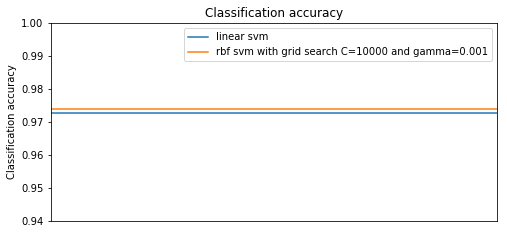

In [2]:
%matplotlib inline

import lsanomaly
import numpy as np  
import pandas as pd  
from sklearn import utils  
import matplotlib
import matplotlib.pyplot as plt
from IPython.core.display import display

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA, IncrementalPCA


# import the CSV from http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html
# this will return a pandas dataframe.
data = pd.read_csv('C:/Users/user/.spyder-py3/features1.csv', low_memory=False)
'''data.loc[data['UUID'] == "RVTNB1502866560357", "attack"] = 1  
data.loc[data['UUID'] != "RVTNB1502866560357", "attack"] = -1
df_majority = data[data['attack']==-1]
df_minority = data[data['attack']==1]
from sklearn.utils import resample
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=830,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
data = pd.concat([df_majority, df_minority_upsampled])

#print(data['attack'].value_counts())'''

#target=np.array(target)
#target = pd.DataFrame(target,columns=['attack'])

#data.drop(["UUID"], axis=1, inplace=True)
categorical_columns=["UUID","Language","Hardware_Model","SDK_Version","Manufacture","Screen_Size","Time_Zone","Country_Code"]
cate_data = data[categorical_columns]

#for col in data.columns.values:
#    print(col, data[col].unique())

pd.set_option('mode.chained_assignment', None)

def label_encode(cate_data, columns):
    for col in columns:
        le = LabelEncoder()
        col_values_unique = list(cate_data[col].unique())
        le_fitted = le.fit(col_values_unique)
 
        col_values = list(cate_data[col].values)
        le.classes_
        col_values_transformed = le.transform(col_values)
        cate_data[col] = col_values_transformed
 
to_be_encoded_cols = cate_data.columns.values
label_encode(cate_data, to_be_encoded_cols)
display(cate_data.head())
target=cate_data['UUID']
target=np.array(target)
#target = pd.DataFrame(target)
#target=target1.values

data.drop(["UUID","Language","Hardware_Model","SDK_Version","Manufacture","Screen_Size","Time_Zone","Country_Code"], axis=1, inplace=True)
data=pd.concat([data,cate_data], axis=1)
data.drop(["UUID"], axis=1, inplace=True)
#display(scaled_data.head())


# check the shape for sanity checking.
data.shape
display(data.head())
print("initial data info",data.info())

from sklearn.model_selection import train_test_split  
from sklearn.cross_validation import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score

print("data is",data.shape)
from skfeature.function.information_theoretical_based import LCSI
from skfeature.function.information_theoretical_based import MRMR

from skfeature.utility.entropy_estimators import *
import scipy.io

from sklearn.preprocessing import StandardScaler
#scaled_data=data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaleddata= pd.DataFrame(scaled_data)
scaled_data=np.array(scaled_data)

print(scaled_data.shape)
print(target.shape)
#display(scaled_data.head())

#display(target.head())
#idx=MRMR.mrmr(scaled_data,target,n_selected_features=50)
'''from sklearn import cross_validation
ss = cross_validation.KFold(5, n_folds=5, shuffle=True)
correct = 0
print("scaled data details - ",scaled_data.info())
print("target data details - ",target.info())
for train, test in ss:
    #print(scaled_data[train])
    #print(target[train])
        # obtain the index of each feature on the training set
    idx,_,_ = MRMR.mrmr(scaled_data[train], target[train], n_selected_features=50)

        # obtain the dataset on the selected features
    features = scaled_data[:, idx[0:50]]
print(features)    '''
'''skb= SVC(kernel="linear")
rfe = RFE(estimator=skb, n_features_to_select=70)
rfe=rfe.fit(scaleddata,target)
print(rfe.support_)
print(rfe.ranking_)
skft = StratifiedKFold(n_splits=5,shuffle=True,random_state=36851234)
for train, test in skft:
    X_train,X_test=scaled_data.iloc[train],scaled_data.iloc[test]
    Y_train,y_test=target.iloc[train],target.iloc[test]
    model1 = svm.OneClassSVM(nu=nu, kernel='rbf', gamma=0.10000000000000001)  
    model1.fit(X_train, Y_train)
    scores = cross_val_score(model1,X_test,y_test, cv=5, scoring='accuracy')
    print(scores)
print(scores.mean())'''
from sklearn import cross_validation
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report

ss = cross_validation.KFold(5, n_folds=5, shuffle=True)
from sklearn.model_selection import RepeatedStratifiedKFold
#rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5,random_state=36851234)
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=36851234)
''''from sklearn.model_selection import GridSearchCV
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
clf = svm.SVC(decision_function_shape='ovo',kernel='rbf')    # linear SVM
grid = GridSearchCV(clf, param_grid=param_grid, cv=skf)
grid.fit(scaled_data, target)
print("The best parameters are %s with a score of %0.2f"% (grid.best_params_, grid.best_score_))'''
plt.figure(figsize=(8, 8))
accuracy = plt.subplot(211)
box=plt.subplot(211)
from sklearn.svm import LinearSVC
clf=SVC(kernel='linear')
#clf=LinearSVC()
rbf=SVC(decision_function_shape='ovo',gamma=0.001,C=10000.0)
correct = 0
fscoreTotal =0
rbf_correct = 0
rbf_fscoreTotal =0
results=[]
for train, test in skf.split(scaled_data,target):
        # obtain the index of each feature on the training set
    idx,_,_ = MRMR.mrmr(scaled_data[train], target[train], n_selected_features=36)

        # obtain the dataset on the selected features
    features = scaled_data[:, idx[0:36]]
        #print(target[train])
        # train a classification model with the selected features on the training dataset
    clf.fit(features[train], target[train])
    #clf1.fit(scaled_data[train],target[train])
    rbf.fit(features[train], target[train])
        # predict the class labels of test data
    y_predict = clf.predict(features[test])
    #y_predict = clf1.predict(scaled_data[test])
    rbf_y_predict = rbf.predict(features[test])
    print("metrics")
        # obtain the classification accuracy on the test data
    acc = accuracy_score(target[test], y_predict)
    rbf_acc = accuracy_score(target[test], rbf_y_predict)
    correct = correct + acc
    rbf_correct = rbf_correct + rbf_acc
    fscore=f1_score(target[test], y_predict,average='weighted')
    rbf_fscore=f1_score(target[test], rbf_y_predict,average='weighted')
    fscoreTotal=fscoreTotal+fscore
    rbf_fscoreTotal=rbf_fscoreTotal+rbf_fscore
        #print("fsc ",f1_score(target[test], y_predict,average='weighted'))
        #print("conf mat ",confusion_matrix(target[test],y_predict))
        #print("ACCURACY: ", (accuracy_score(target[test], y_predict)))
    report = classification_report(target[test], y_predict)
    print(report)
    rbreport = classification_report(target[test], rbf_y_predict)
    print(rbreport)
    print("each loop acc",acc)
    print("each loop rbf acc",rbf_acc)
score=float(correct)/5
rbfscore=float(rbf_correct)/5
results.append(score)
results.append(rbfscore)
print("f1 ",float(fscoreTotal)/5)
    # output the average classification accuracy over all 10 folds
print("Accuracy:", float(correct)/5)
print("f1 ",float(rbf_fscoreTotal)/5)
    # output the average classification accuracy over all 10 folds
print("Accuracy:", float(rbf_correct)/5)

accuracy.plot([scaled_data.shape[1], scaled_data.shape[0]],
              [score, score], label="linear svm")
accuracy.plot([scaled_data.shape[1], scaled_data.shape[0]],
              [rbfscore, rbfscore], label="rbf svm with grid search C=10000 and gamma=0.001")
accuracy.set_title("Classification accuracy")
accuracy.set_xlim(scaled_data.shape[1], scaled_data.shape[0])
accuracy.set_xticks(())
accuracy.set_ylim(0.94, 1)
accuracy.set_ylabel("Classification accuracy")
accuracy.legend(loc='best')
##svc=SelectKBest(mutual_info_classif, k=50).fit_transform(data,target)
#svc = SVC(kernel="linear")
#rfe = RFE(estimator=svc, n_features_to_select=10)
#rfe.fit(data, target)
print("here")
box.boxplot(results)
box.set_title("Classification accuracy")
box.set_xlim(scaled_data.shape[1], scaled_data.shape[0])
box.set_xticks(())
box.set_ylim(0.94, 1)
box.set_ylabel("Classification accuracy")
box.legend(loc='best')
plt.show()

,UUID
0,48
1,48
2,48
3,48
4,48


,pLN1,p.2,pLN3,pt4,pi5,pe6,pLN7,p58,pLN9,pSH10,...,du2a13,du2n14,du2n15,avgdu,avgud,avgdd,avguu,avdu2,avgp,avga
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2302,670740857,973,37.875,24.466667,56.800000,55.866667,88.200000,1.0,0.004412
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,670740857,3015,1081,37.625,31.933333,64.066667,63.266667,95.400000,1.0,0.004167
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2361,1918,884,64.125,453.733333,515.933333,513.133333,575.333333,1.0,0.008333
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1918,1438,827,63.250,347.733333,407.733333,406.400000,466.400000,1.0,0.008211
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2302,670740857,973,69.375,-9.133333,56.800000,55.866667,121.800000,1.0,0.009804


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7700 entries, 0 to 7699
Columns: 147 entries, pLN1 to avga
dtypes: float64(71), int64(76)
memory usage: 8.6 MB
initial data info None
data is (7700, 147)
(7700, 147)
(7700,)


C:\Users\S\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


metrics
             precision    recall  f1-score   support

          0       0.74      0.85      0.79        20
          1       0.79      0.95      0.86        20
          2       0.95      0.95      0.95        20
          3       0.95      0.95      0.95        20
          4       0.68      0.65      0.67        20
          5       1.00      1.00      1.00        20
          6       1.00      0.95      0.97        20
          7       0.71      0.85      0.77        20
          8       0.25      0.40      0.31        20
          9       0.50      0.60      0.55        20
         10       0.40      0.30      0.34        20
         11       0.95      1.00      0.98        20
         12       0.82      0.70      0.76        20
         13       0.75      0.45      0.56        20
         14       0.89      0.80      0.84        20
         15       0.29      0.50      0.37        20
         16       1.00      0.90      0.95        20
         17       1.00      0.95     

metrics
             precision    recall  f1-score   support

          0       0.95      0.90      0.92        20
          1       0.94      0.80      0.86        20
          2       1.00      1.00      1.00        20
          3       1.00      0.90      0.95        20
          4       0.60      0.75      0.67        20
          5       1.00      0.95      0.97        20
          6       1.00      1.00      1.00        20
          7       0.90      0.90      0.90        20
          8       0.24      0.40      0.30        20
          9       0.69      0.90      0.78        20
         10       0.30      0.35      0.33        20
         11       0.86      0.95      0.90        20
         12       1.00      1.00      1.00        20
         13       0.95      1.00      0.98        20
         14       0.95      0.95      0.95        20
         15       0.52      0.55      0.54        20
         16       1.00      0.90      0.95        20
         17       1.00      0.95     

C:\Users\S\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\S\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


metrics
             precision    recall  f1-score   support

          0       0.89      0.85      0.87        20
          1       0.94      0.75      0.83        20
          2       1.00      1.00      1.00        20
          3       1.00      0.95      0.97        20
          4       0.47      0.45      0.46        20
          5       1.00      1.00      1.00        20
          6       1.00      1.00      1.00        20
          7       0.83      1.00      0.91        20
          8       0.20      0.10      0.13        20
          9       0.78      0.90      0.84        20
         10       0.53      0.50      0.51        20
         11       1.00      1.00      1.00        20
         12       1.00      1.00      1.00        20
         13       0.95      0.95      0.95        20
         14       1.00      1.00      1.00        20
         15       0.38      0.50      0.43        20
         16       0.95      0.90      0.92        20
         17       0.95      0.95     

metrics
             precision    recall  f1-score   support

          0       0.82      0.90      0.86        20
          1       0.93      0.70      0.80        20
          2       0.83      0.95      0.88        20
          3       0.95      0.90      0.92        20
          4       0.67      0.90      0.77        20
          5       1.00      1.00      1.00        20
          6       1.00      1.00      1.00        20
          7       0.88      0.70      0.78        20
          8       0.26      0.30      0.28        20
          9       0.64      0.80      0.71        20
         10       0.22      0.30      0.26        20
         11       1.00      0.95      0.97        20
         12       0.67      0.80      0.73        20
         13       0.58      0.35      0.44        20
         14       0.90      0.95      0.93        20
         15       0.35      0.55      0.43        20
         16       1.00      0.85      0.92        20
         17       0.95      0.95     

metrics
             precision    recall  f1-score   support

          0       0.95      0.95      0.95        20
          1       0.95      1.00      0.98        20
          2       1.00      1.00      1.00        20
          3       0.95      0.90      0.92        20
          4       0.58      0.70      0.64        20
          5       1.00      1.00      1.00        20
          6       1.00      1.00      1.00        20
          7       0.86      0.90      0.88        20
          8       0.34      0.50      0.41        20
          9       0.64      0.90      0.75        20
         10       0.33      0.35      0.34        20
         11       1.00      0.95      0.97        20
         12       0.91      1.00      0.95        20
         13       0.95      0.95      0.95        20
         14       0.83      0.95      0.88        20
         15       0.44      0.60      0.51        20
         16       0.86      0.95      0.90        20
         17       0.95      0.90     

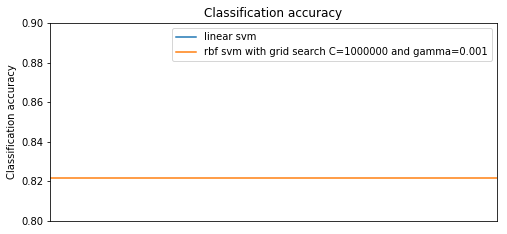

In [2]:
%matplotlib inline

import lsanomaly
import numpy as np  
import pandas as pd  
from sklearn import utils  
import matplotlib
import matplotlib.pyplot as plt
from IPython.core.display import display

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA, IncrementalPCA


# import the CSV from http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html
# this will return a pandas dataframe.
data = pd.read_csv('C:/Users/S/Documents/PY/increased100features.csv', low_memory=False)
'''data.loc[data['UUID'] == "RVTNB1502866560357", "attack"] = 1  
data.loc[data['UUID'] != "RVTNB1502866560357", "attack"] = -1
df_majority = data[data['attack']==-1]
df_minority = data[data['attack']==1]
from sklearn.utils import resample
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=830,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
data = pd.concat([df_majority, df_minority_upsampled])

#print(data['attack'].value_counts())'''

#target=np.array(target)
#target = pd.DataFrame(target,columns=['attack'])

#data.drop(["UUID"], axis=1, inplace=True)
categorical_columns=["UUID"]
cate_data = data[categorical_columns]

#for col in data.columns.values:
#    print(col, data[col].unique())

pd.set_option('mode.chained_assignment', None)

def label_encode(cate_data, columns):
    for col in columns:
        le = LabelEncoder()
        col_values_unique = list(cate_data[col].unique())
        le_fitted = le.fit(col_values_unique)
 
        col_values = list(cate_data[col].values)
        le.classes_
        col_values_transformed = le.transform(col_values)
        cate_data[col] = col_values_transformed
 
to_be_encoded_cols = cate_data.columns.values
label_encode(cate_data, to_be_encoded_cols)
display(cate_data.head())
target=cate_data['UUID']
target=np.array(target)
#target = pd.DataFrame(target)
#target=target1.values

data.drop(["UUID"], axis=1, inplace=True)
data=pd.concat([data,cate_data], axis=1)
data.drop(["UUID"], axis=1, inplace=True)
#display(scaled_data.head())


# check the shape for sanity checking.
data.shape
display(data.head())
print("initial data info",data.info())

from sklearn.model_selection import train_test_split  
from sklearn.cross_validation import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score

print("data is",data.shape)
from skfeature.function.information_theoretical_based import LCSI
from skfeature.function.information_theoretical_based import MRMR

from skfeature.utility.entropy_estimators import *
import scipy.io

from sklearn.preprocessing import StandardScaler
#scaled_data=data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaleddata= pd.DataFrame(scaled_data)
scaled_data=np.array(scaled_data)

print(scaled_data.shape)
print(target.shape)
#display(scaled_data.head())

#display(target.head())
#idx=MRMR.mrmr(scaled_data,target,n_selected_features=50)
'''from sklearn import cross_validation
ss = cross_validation.KFold(5, n_folds=5, shuffle=True)
correct = 0
print("scaled data details - ",scaled_data.info())
print("target data details - ",target.info())
for train, test in ss:
    #print(scaled_data[train])
    #print(target[train])
        # obtain the index of each feature on the training set
    idx,_,_ = MRMR.mrmr(scaled_data[train], target[train], n_selected_features=50)

        # obtain the dataset on the selected features
    features = scaled_data[:, idx[0:50]]
print(features)    '''
'''skb= SVC(kernel="linear")
rfe = RFE(estimator=skb, n_features_to_select=70)
rfe=rfe.fit(scaleddata,target)
print(rfe.support_)
print(rfe.ranking_)
skft = StratifiedKFold(n_splits=5,shuffle=True,random_state=36851234)
for train, test in skft:
    X_train,X_test=scaled_data.iloc[train],scaled_data.iloc[test]
    Y_train,y_test=target.iloc[train],target.iloc[test]
    model1 = svm.OneClassSVM(nu=nu, kernel='rbf', gamma=0.10000000000000001)  
    model1.fit(X_train, Y_train)
    scores = cross_val_score(model1,X_test,y_test, cv=5, scoring='accuracy')
    print(scores)
print(scores.mean())'''
from sklearn import cross_validation
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report

ss = cross_validation.KFold(5, n_folds=5, shuffle=True)
from sklearn.model_selection import RepeatedStratifiedKFold
#rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5,random_state=36851234)
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=36851234)
from sklearn.model_selection import GridSearchCV
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
'''clf = svm.SVC(decision_function_shape='ovo',kernel='rbf')    # linear SVM
grid = GridSearchCV(clf, param_grid=param_grid, cv=skf)
grid.fit(scaled_data, target)
print("The best parameters are %s with a score of %0.2f"% (grid.best_params_, grid.best_score_))'''
plt.figure(figsize=(8, 8))
accuracy = plt.subplot(211)
box=plt.subplot(211)
from sklearn.svm import LinearSVC
clf=SVC(kernel='linear')
#clf=LinearSVC()
rbf=SVC(decision_function_shape='ovo',gamma=0.001,C=1000000.0)
correct = 0
fscoreTotal =0
rbf_correct = 0
rbf_fscoreTotal =0
results=[]
for train, test in skf.split(scaled_data,target):
        # obtain the index of each feature on the training set
    idx,_,_ = MRMR.mrmr(scaled_data[train], target[train], n_selected_features=36)

        # obtain the dataset on the selected features
    features = scaled_data[:, idx[0:79]]
        #print(target[train])
        # train a classification model with the selected features on the training dataset
    clf.fit(features[train], target[train])
    #clf1.fit(scaled_data[train],target[train])
    rbf.fit(features[train], target[train])
        # predict the class labels of test data
    y_predict = clf.predict(features[test])
    #y_predict = clf1.predict(scaled_data[test])
    rbf_y_predict = rbf.predict(features[test])
    print("metrics")
        # obtain the classification accuracy on the test data
    acc = accuracy_score(target[test], y_predict)
    rbf_acc = accuracy_score(target[test], rbf_y_predict)
    correct = correct + acc
    rbf_correct = rbf_correct + rbf_acc
    fscore=f1_score(target[test], y_predict,average='weighted')
    rbf_fscore=f1_score(target[test], rbf_y_predict,average='weighted')
    fscoreTotal=fscoreTotal+fscore
    rbf_fscoreTotal=rbf_fscoreTotal+rbf_fscore
        #print("fsc ",f1_score(target[test], y_predict,average='weighted'))
        #print("conf mat ",confusion_matrix(target[test],y_predict))
        #print("ACCURACY: ", (accuracy_score(target[test], y_predict)))
    report = classification_report(target[test], y_predict)
    print(report)
    rbreport = classification_report(target[test], rbf_y_predict)
    print(rbreport)
    print("each loop acc",acc)
    print("each loop rbf acc",rbf_acc)
score=float(correct)/5
rbfscore=float(rbf_correct)/5
results.append(score)
results.append(rbfscore)
print("f1 ",float(fscoreTotal)/5)
    # output the average classification accuracy over all 10 folds
print("Accuracy:", float(correct)/5)
print("f1 ",float(rbf_fscoreTotal)/5)
    # output the average classification accuracy over all 10 folds
print("Accuracy:", float(rbf_correct)/5)

accuracy.plot([scaled_data.shape[1], scaled_data.shape[0]],
              [score, score], label="linear svm")
accuracy.plot([scaled_data.shape[1], scaled_data.shape[0]],
              [rbfscore, rbfscore], label="rbf svm with grid search C=1000000 and gamma=0.001")
accuracy.set_title("Classification accuracy")
accuracy.set_xlim(scaled_data.shape[1], scaled_data.shape[0])
accuracy.set_xticks(())
accuracy.set_ylim(0.80, 0.90)
accuracy.set_ylabel("Classification accuracy")
accuracy.legend(loc='best')
##svc=SelectKBest(mutual_info_classif, k=50).fit_transform(data,target)
#svc = SVC(kernel="linear")
#rfe = RFE(estimator=svc, n_features_to_select=10)
#rfe.fit(data, target)
print("here")
box.boxplot(results)
box.set_title("Classification accuracy")
box.set_xlim(scaled_data.shape[1], scaled_data.shape[0])
box.set_xticks(())
box.set_ylim(0.80, 0.90)
box.set_ylabel("Classification accuracy")
box.legend(loc='best')
plt.show()

In [18]:
%matplotlib inline

import lsanomaly
import numpy as np  
import pandas as pd  
from sklearn import utils  
import matplotlib
import matplotlib.pyplot as plt
from IPython.core.display import display

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA, IncrementalPCA


# import the CSV from http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html
# this will return a pandas dataframe.
data = pd.read_csv('C:/Users/S/Documents/PY/features1.csv', low_memory=False)
'''data.loc[data['UUID'] == "RVTNB1502866560357", "attack"] = 1  
data.loc[data['UUID'] != "RVTNB1502866560357", "attack"] = -1
df_majority = data[data['attack']==-1]
df_minority = data[data['attack']==1]
from sklearn.utils import resample
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=830,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
data = pd.concat([df_majority, df_minority_upsampled])

#print(data['attack'].value_counts())'''

#target=np.array(target)
#target = pd.DataFrame(target,columns=['attack'])

#data.drop(["UUID"], axis=1, inplace=True)
categorical_columns=["UUID","Language","Hardware_Model","SDK_Version","Manufacture","Screen_Size","Time_Zone","Country_Code"]
cate_data = data[categorical_columns]

#for col in data.columns.values:
#    print(col, data[col].unique())

pd.set_option('mode.chained_assignment', None)

def label_encode(cate_data, columns):
    for col in columns:
        le = LabelEncoder()
        col_values_unique = list(cate_data[col].unique())
        le_fitted = le.fit(col_values_unique)
 
        col_values = list(cate_data[col].values)
        le.classes_
        col_values_transformed = le.transform(col_values)
        cate_data[col] = col_values_transformed
 
to_be_encoded_cols = cate_data.columns.values
label_encode(cate_data, to_be_encoded_cols)
display(cate_data.head())
target=cate_data['UUID']
target=np.array(target)
#target = pd.DataFrame(target)
#target=target1.values

data.drop(["UUID","Language","Hardware_Model","SDK_Version","Manufacture","Screen_Size","Time_Zone","Country_Code"], axis=1, inplace=True)
data=pd.concat([data,cate_data], axis=1)
data.drop(["UUID"], axis=1, inplace=True)
#display(scaled_data.head())


# check the shape for sanity checking.
data.shape
display(data.head())
print("initial data info",data.info())

from sklearn.model_selection import train_test_split  
from sklearn.cross_validation import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score

print("data is",data.shape)
from skfeature.function.information_theoretical_based import LCSI
from skfeature.function.information_theoretical_based import MRMR

from skfeature.utility.entropy_estimators import *
import scipy.io
import csv
from sklearn.preprocessing import StandardScaler
#scaled_data=data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaleddata= pd.DataFrame(scaled_data)
scaled_data=np.array(scaled_data)

print(scaled_data.shape)
print(target.shape)
#display(scaled_data.head())

#display(target.head())
#idx=MRMR.mrmr(scaled_data,target,n_selected_features=50)
'''from sklearn import cross_validation
ss = cross_validation.KFold(5, n_folds=5, shuffle=True)
correct = 0
print("scaled data details - ",scaled_data.info())
print("target data details - ",target.info())
for train, test in ss:
    #print(scaled_data[train])
    #print(target[train])
        # obtain the index of each feature on the training set
    idx,_,_ = MRMR.mrmr(scaled_data[train], target[train], n_selected_features=50)

        # obtain the dataset on the selected features
    features = scaled_data[:, idx[0:50]]
print(features)    '''
'''skb= SVC(kernel="linear")
rfe = RFE(estimator=skb, n_features_to_select=70)
rfe=rfe.fit(scaleddata,target)
print(rfe.support_)
print(rfe.ranking_)
skft = StratifiedKFold(n_splits=5,shuffle=True,random_state=36851234)
for train, test in skft:
    X_train,X_test=scaled_data.iloc[train],scaled_data.iloc[test]
    Y_train,y_test=target.iloc[train],target.iloc[test]
    model1 = svm.OneClassSVM(nu=nu, kernel='rbf', gamma=0.10000000000000001)  
    model1.fit(X_train, Y_train)
    scores = cross_val_score(model1,X_test,y_test, cv=5, scoring='accuracy')
    print(scores)
print(scores.mean())'''
from sklearn import cross_validation
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report

ss = cross_validation.KFold(5, n_folds=5, shuffle=True)
from sklearn.model_selection import RepeatedStratifiedKFold
#rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5,random_state=36851234)
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=36851234)
''''from sklearn.model_selection import GridSearchCV
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
clf = svm.SVC(decision_function_shape='ovo',kernel='rbf')    # linear SVM
grid = GridSearchCV(clf, param_grid=param_grid, cv=skf)
grid.fit(scaled_data, target)
print("The best parameters are %s with a score of %0.2f"% (grid.best_params_, grid.best_score_))'''

from sklearn.svm import LinearSVC
clf=RandomForestClassifier(n_estimators=5,class_weight='balanced')


correct = 0
fscoreTotal =0

results=[]
for train, test in skf.split(scaled_data,target):
        # obtain the index of each feature on the training set
    idx,_,_ = MRMR.mrmr(scaled_data[train], target[train], n_selected_features=36)

        # obtain the dataset on the selected features
    features = scaled_data[:, idx[0:36]]
    
        # train a classification model with the selected features on the training dataset
    clf.fit(features[train], target[train])
    #clf1.fit(scaled_data[train],target[train])
    
        # predict the class labels of test data
    y_predict = clf.predict(features[test])
    #y_predict = clf1.predict(scaled_data[test])
    
    print("metrics")
        # obtain the classification accuracy on the test data
    acc = accuracy_score(target[test], y_predict)
    
    correct = correct + acc
    
    fscore=f1_score(target[test], y_predict,average='weighted')
    
    fscoreTotal=fscoreTotal+fscore
    
        #print("fsc ",f1_score(target[test], y_predict,average='weighted'))
        #print("conf mat ",confusion_matrix(target[test],y_predict))
        #print("ACCURACY: ", (accuracy_score(target[test], y_predict)))
    report = classification_report(target[test], y_predict)
    print(report)
    
    print("each loop acc",acc)
   
score=float(correct)/5

results.append(score)

print("random f1 ",float(fscoreTotal)/5)
    # output the average classification accuracy over all 10 folds
print("random Accuracy:", float(correct)/5)


,UUID,Language,Hardware_Model,SDK_Version,Manufacture,Screen_Size,Time_Zone,Country_Code
0,48,0,40,3,18,23,7,1
1,48,0,40,3,18,23,7,1
2,48,0,40,3,18,23,7,1
3,48,0,40,3,18,23,7,1
4,48,0,40,3,18,23,7,1


,Num_of_CPU_Cores,pLN1,p.2,pLN3,pt4,pi5,pe6,pLN7,p58,pLN9,...,avdu2,avgp,avga,Language,Hardware_Model,SDK_Version,Manufacture,Screen_Size,Time_Zone,Country_Code
0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,88.200000,1.0,0.004412,0,40,3,18,23,7,1
1,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,95.400000,1.0,0.004167,0,40,3,18,23,7,1
2,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,575.333333,1.0,0.008333,0,40,3,18,23,7,1
3,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,466.400000,1.0,0.008211,0,40,3,18,23,7,1
4,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,121.800000,1.0,0.009804,0,40,3,18,23,7,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Columns: 155 entries, Num_of_CPU_Cores to Country_Code
dtypes: float64(148), int64(7)
memory usage: 932.5 KB
initial data info None
data is (770, 155)
(770, 155)
(770,)
metrics
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         2
          1       1.00      1.00      1.00         2
          2       1.00      1.00      1.00         2
          3       1.00      1.00      1.00         2
          4       0.67      1.00      0.80         2
          5       1.00      1.00      1.00         2
          6       1.00      1.00      1.00         2
          7       1.00      1.00      1.00         2
          8       0.67      1.00      0.80         2
          9       1.00      1.00      1.00         2
         10       1.00      1.00      1.00         2
         11       1.00      1.00      1.00         2
         12       1.00      1.00      1.00         2
        

metrics
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         2
          1       0.67      1.00      0.80         2
          2       1.00      1.00      1.00         2
          3       1.00      1.00      1.00         2
          4       1.00      1.00      1.00         2
          5       1.00      1.00      1.00         2
          6       1.00      1.00      1.00         2
          7       1.00      1.00      1.00         2
          8       1.00      1.00      1.00         2
          9       1.00      1.00      1.00         2
         10       1.00      1.00      1.00         2
         11       1.00      1.00      1.00         2
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         2
         14       1.00      1.00      1.00         2
         15       1.00      1.00      1.00         2
         16       1.00      1.00      1.00         2
         17       1.00      1.00     

metrics
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         2
          1       1.00      1.00      1.00         2
          2       1.00      1.00      1.00         2
          3       1.00      1.00      1.00         2
          4       1.00      1.00      1.00         2
          5       1.00      1.00      1.00         2
          6       1.00      1.00      1.00         2
          7       1.00      1.00      1.00         2
          8       1.00      1.00      1.00         2
          9       1.00      1.00      1.00         2
         10       1.00      1.00      1.00         2
         11       1.00      1.00      1.00         2
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         2
         14       1.00      1.00      1.00         2
         15       1.00      0.50      0.67         2
         16       1.00      1.00      1.00         2
         17       1.00      1.00     

In [26]:
%matplotlib inline

import lsanomaly
import numpy as np  
import pandas as pd  
from sklearn import utils  
import matplotlib
import matplotlib.pyplot as plt
from IPython.core.display import display

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA, IncrementalPCA


# import the CSV from http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html
# this will return a pandas dataframe.
data = pd.read_csv('C:/Users/S/Documents/PY/increased100features.csv', low_memory=False)
'''data.loc[data['UUID'] == "RVTNB1502866560357", "attack"] = 1  
data.loc[data['UUID'] != "RVTNB1502866560357", "attack"] = -1
df_majority = data[data['attack']==-1]
df_minority = data[data['attack']==1]
from sklearn.utils import resample
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=830,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
data = pd.concat([df_majority, df_minority_upsampled])

#print(data['attack'].value_counts())'''

#target=np.array(target)
#target = pd.DataFrame(target,columns=['attack'])

#data.drop(["UUID"], axis=1, inplace=True)
categorical_columns=["UUID"]
cate_data = data[categorical_columns]

#for col in data.columns.values:
#    print(col, data[col].unique())

pd.set_option('mode.chained_assignment', None)

def label_encode(cate_data, columns):
    for col in columns:
        le = LabelEncoder()
        col_values_unique = list(cate_data[col].unique())
        le_fitted = le.fit(col_values_unique)
 
        col_values = list(cate_data[col].values)
        le.classes_
        col_values_transformed = le.transform(col_values)
        cate_data[col] = col_values_transformed
 
to_be_encoded_cols = cate_data.columns.values
label_encode(cate_data, to_be_encoded_cols)
display(cate_data.head())
target=cate_data['UUID']
target=np.array(target)
#target = pd.DataFrame(target)
#target=target1.values

data.drop(["UUID"], axis=1, inplace=True)
data=pd.concat([data,cate_data], axis=1)
data.drop(["UUID"], axis=1, inplace=True)
#display(scaled_data.head())


# check the shape for sanity checking.
data.shape
display(data.head())
print("initial data info",data.info())

from sklearn.model_selection import train_test_split  
from sklearn.cross_validation import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score

print("data is",data.shape)
from skfeature.function.information_theoretical_based import LCSI
from skfeature.function.information_theoretical_based import MRMR

from skfeature.utility.entropy_estimators import *
import scipy.io
import csv
from sklearn.preprocessing import StandardScaler
#scaled_data=data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaleddata= pd.DataFrame(scaled_data)
scaled_data=np.array(scaled_data)

print(scaled_data.shape)
print(target.shape)
#display(scaled_data.head())

#display(target.head())
#idx=MRMR.mrmr(scaled_data,target,n_selected_features=50)
'''from sklearn import cross_validation
ss = cross_validation.KFold(5, n_folds=5, shuffle=True)
correct = 0
print("scaled data details - ",scaled_data.info())
print("target data details - ",target.info())
for train, test in ss:
    #print(scaled_data[train])
    #print(target[train])
        # obtain the index of each feature on the training set
    idx,_,_ = MRMR.mrmr(scaled_data[train], target[train], n_selected_features=50)

        # obtain the dataset on the selected features
    features = scaled_data[:, idx[0:50]]
print(features)    '''
'''skb= SVC(kernel="linear")
rfe = RFE(estimator=skb, n_features_to_select=70)
rfe=rfe.fit(scaleddata,target)
print(rfe.support_)
print(rfe.ranking_)
skft = StratifiedKFold(n_splits=5,shuffle=True,random_state=36851234)
for train, test in skft:
    X_train,X_test=scaled_data.iloc[train],scaled_data.iloc[test]
    Y_train,y_test=target.iloc[train],target.iloc[test]
    model1 = svm.OneClassSVM(nu=nu, kernel='rbf', gamma=0.10000000000000001)  
    model1.fit(X_train, Y_train)
    scores = cross_val_score(model1,X_test,y_test, cv=5, scoring='accuracy')
    print(scores)
print(scores.mean())'''
from sklearn import cross_validation
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report

ss = cross_validation.KFold(5, n_folds=5, shuffle=True)
from sklearn.model_selection import RepeatedStratifiedKFold
#rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5,random_state=36851234)
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=36851234)
''''from sklearn.model_selection import GridSearchCV
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
clf = svm.SVC(decision_function_shape='ovo',kernel='rbf')    # linear SVM
grid = GridSearchCV(clf, param_grid=param_grid, cv=skf)
grid.fit(scaled_data, target)
print("The best parameters are %s with a score of %0.2f"% (grid.best_params_, grid.best_score_))'''

from sklearn.svm import LinearSVC
clf=RandomForestClassifier(n_estimators=5,class_weight='balanced')


correct = 0
fscoreTotal =0

results=[]
for train, test in skf.split(scaled_data,target):
        # obtain the index of each feature on the training set
    idx,_,_ = MRMR.mrmr(scaled_data[train], target[train], n_selected_features=36)

        # obtain the dataset on the selected features
    features = scaled_data[:, idx[0:79]]
    
        # train a classification model with the selected features on the training dataset
    clf.fit(features[train], target[train])
    #clf1.fit(scaled_data[train],target[train])
    
        # predict the class labels of test data
    y_predict = clf.predict(features[test])
    #y_predict = clf1.predict(scaled_data[test])
    
    print("metrics")
        # obtain the classification accuracy on the test data
    acc = accuracy_score(target[test], y_predict)
    
    correct = correct + acc
    
    fscore=f1_score(target[test], y_predict,average='weighted')
    
    fscoreTotal=fscoreTotal+fscore
    
        #print("fsc ",f1_score(target[test], y_predict,average='weighted'))
        #print("conf mat ",confusion_matrix(target[test],y_predict))
        #print("ACCURACY: ", (accuracy_score(target[test], y_predict)))
    report = classification_report(target[test], y_predict)
    print(report)
    
    print("each loop acc",acc)
   
score=float(correct)/5

results.append(score)

print("random f1 ",float(fscoreTotal)/5)
    # output the average classification accuracy over all 10 folds
print("random Accuracy:", float(correct)/5)


,UUID
0,48
1,48
2,48
3,48
4,48


,pLN1,p.2,pLN3,pt4,pi5,pe6,pLN7,p58,pLN9,pSH10,...,du2a13,du2n14,du2n15,avgdu,avgud,avgdd,avguu,avdu2,avgp,avga
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2302,670740857,973,37.875,24.466667,56.800000,55.866667,88.200000,1.0,0.004412
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,670740857,3015,1081,37.625,31.933333,64.066667,63.266667,95.400000,1.0,0.004167
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2361,1918,884,64.125,453.733333,515.933333,513.133333,575.333333,1.0,0.008333
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1918,1438,827,63.250,347.733333,407.733333,406.400000,466.400000,1.0,0.008211
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2302,670740857,973,69.375,-9.133333,56.800000,55.866667,121.800000,1.0,0.009804


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7700 entries, 0 to 7699
Columns: 147 entries, pLN1 to avga
dtypes: float64(71), int64(76)
memory usage: 8.6 MB
initial data info None
data is (7700, 147)
(7700, 147)
(7700,)
metrics
             precision    recall  f1-score   support

          0       0.80      1.00      0.89        20
          1       0.91      1.00      0.95        20
          2       0.95      1.00      0.98        20
          3       1.00      1.00      1.00        20
          4       1.00      1.00      1.00        20
          5       1.00      1.00      1.00        20
          6       1.00      1.00      1.00        20
          7       1.00      1.00      1.00        20
          8       0.78      0.90      0.84        20
          9       1.00      0.95      0.97        20
         10       0.80      1.00      0.89        20
         11       1.00      1.00      1.00        20
         12       1.00      1.00      1.00        20
         13       1.00   

metrics
             precision    recall  f1-score   support

          0       0.95      1.00      0.98        20
          1       1.00      1.00      1.00        20
          2       0.95      1.00      0.98        20
          3       1.00      1.00      1.00        20
          4       1.00      1.00      1.00        20
          5       1.00      1.00      1.00        20
          6       1.00      1.00      1.00        20
          7       1.00      1.00      1.00        20
          8       0.76      0.95      0.84        20
          9       1.00      0.95      0.97        20
         10       0.95      0.95      0.95        20
         11       1.00      1.00      1.00        20
         12       0.95      1.00      0.98        20
         13       1.00      1.00      1.00        20
         14       1.00      1.00      1.00        20
         15       0.90      0.90      0.90        20
         16       1.00      0.90      0.95        20
         17       1.00      1.00     

metrics
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        20
          1       1.00      0.90      0.95        20
          2       1.00      1.00      1.00        20
          3       1.00      1.00      1.00        20
          4       1.00      1.00      1.00        20
          5       1.00      1.00      1.00        20
          6       0.95      1.00      0.98        20
          7       1.00      1.00      1.00        20
          8       0.86      0.95      0.90        20
          9       0.95      1.00      0.98        20
         10       0.87      1.00      0.93        20
         11       0.95      1.00      0.98        20
         12       1.00      1.00      1.00        20
         13       1.00      1.00      1.00        20
         14       1.00      0.95      0.97        20
         15       0.87      1.00      0.93        20
         16       1.00      1.00      1.00        20
         17       1.00      1.00     